In [1]:

import matplotlib

import sys, os
import subprocess

#print(os.getcwd())
sys.path.insert(0,os.getcwd()+'/../')

from plot_result import sum_cur
import plot_result

val_t_dir = os.getcwd()+'/../MFlibrary_testing/stdcellTesting/valve_combine'
val_m_t_dir = os.getcwd()+'/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem'
plot_r = plot_result.plot_prn

lib = "./../../Components/verilogA_build/lib/MFXyce.so"

def run_xyce(lib, cir):
    if not os.path.isfile(lib):
        raise ValueError(lib + " library file does not exist") 

    if not os.path.isfile(cir):
        raise ValueError(cir + " not able to find ciruit file") 

    cir_root, fname = os.path.split(cir)
    
    subprocess.run(['sh', './../run_test.sh', lib, cir, cir_root])

def run_and_plot(lib, cir, plot_type=None, plot_nodes=None):

    cir_a = val_t_dir+'/'+cir
    prn   = val_t_dir+'/results/'+cir+'.prn'
    
    run_xyce(lib, cir_a)
    
    # only the definition above needs to be changed
    run_xyce(lib, cir_a)
    plot_r(prn, plot_type=plot_type, plot_nodes=plot_nodes)
    
def run_and_plot_vm(lib, cir, plot_type=None, plot_nodes=None):

    cir_a = val_m_t_dir+'/'+cir
    prn   = val_m_t_dir+'/results/'+cir+'.prn'
    
    run_xyce(lib, cir_a)
    
    # only the definition above needs to be changed
    run_xyce(lib, cir_a)
    plot_r(prn, plot_type=plot_type, plot_nodes=plot_nodes)

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.cir.log
plot: valve_combine_20px_0_0.cir.prn


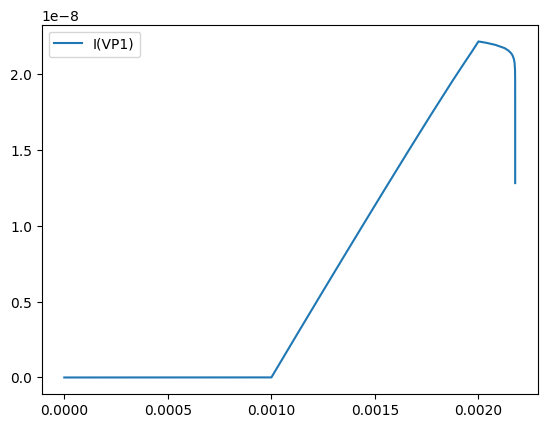

plot: valve_combine_20px_0_0.cir.prn


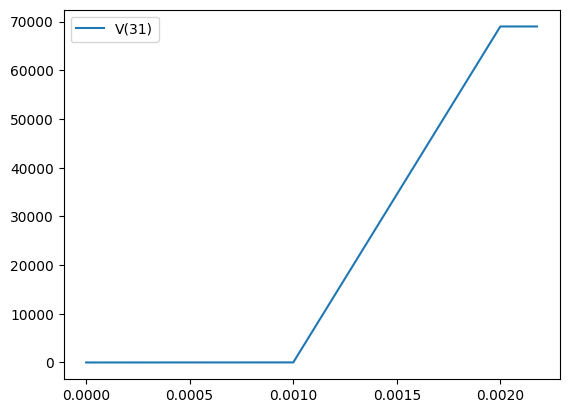


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 1 2 3e12
r2 4 0 3e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V1 valv1 2 3 31 threshold_pressure_kPa=66e3

vp1 3 4 0V

.tran 0.01ms 20ms 0s 1ms
.print tran I(vp1) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Displ vol:1.5135350664264664e-11


In [54]:
cir = 'valve_combine_20px_0_0.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp)

print("Displ vol:"+str(I_vp_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.cir.log
plot: valve_combine_20px_0_1.cir.prn


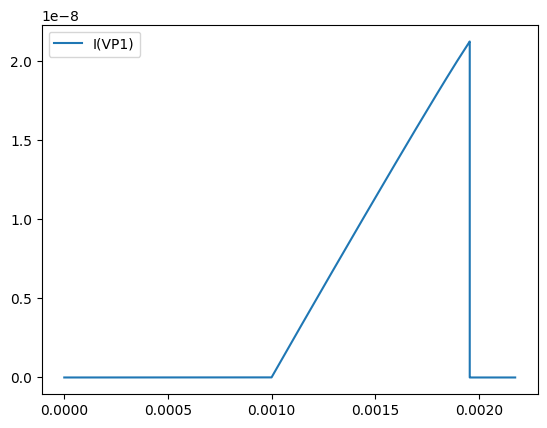

plot: valve_combine_20px_0_1.cir.prn


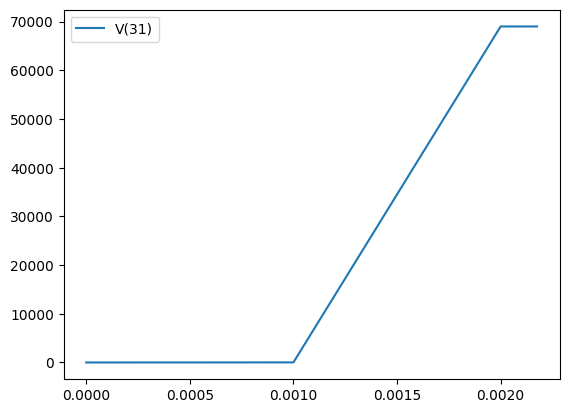


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 3 2 3e12
r2 4 0 3e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V1 valv1 3 4 31 threshold_pressure_kPa=66e3

vp1 2 1 0V

.tran 0.01ms 20ms 0s 0.05ms
.print tran I(vp1) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Displ vol:1.032423871176422e-11


In [55]:
cir = 'valve_combine_20px_0_1.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp)

print("Displ vol:"+str(I_vp_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.cir.log
plot: valve_combine_20px_0_0.v2.cir.prn


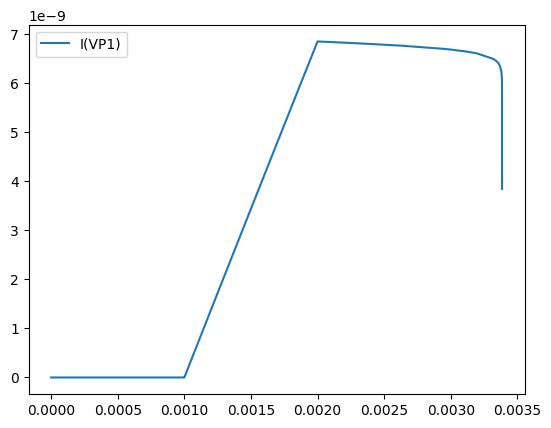

plot: valve_combine_20px_0_0.v2.cir.prn


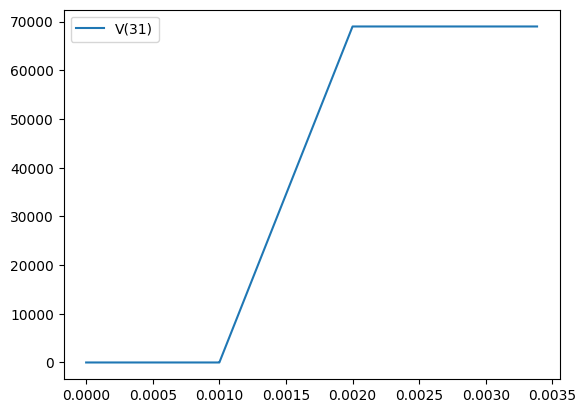


.options linsol type=klu

*vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 0 2 1e13
r2 4 0 1e13

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V2 valv1 2 3 31 
*threshold_pressure_kPa=60e3

vp1 3 4 0V

.tran 0.01ms 10ms 0s 1ms
.print tran I(vp1) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Displ vol:1.2734106567145547e-11


In [59]:
cir = 'valve_combine_20px_0_0.v2.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp)

print("Displ vol:"+str(I_vp_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.cir.log
plot: valve_combine_20px_0_1.v2.cir.prn


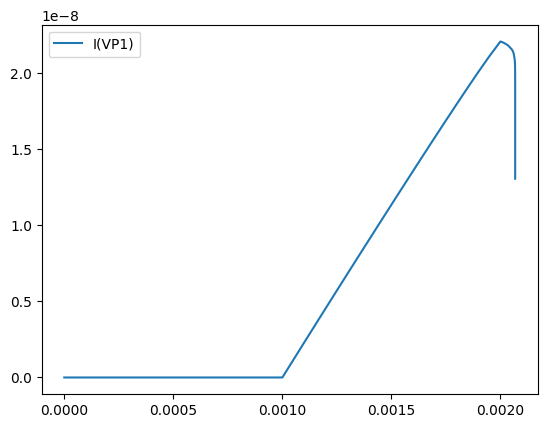

plot: valve_combine_20px_0_1.v2.cir.prn


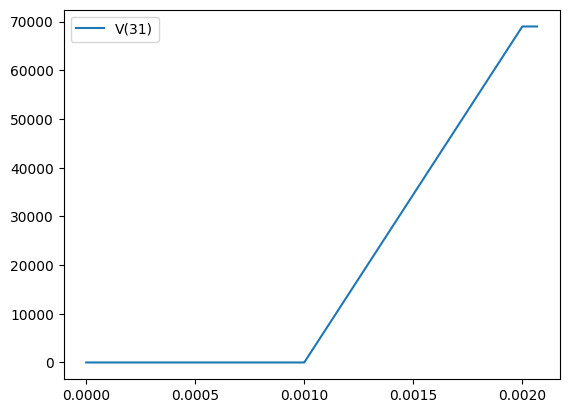


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 3 2 3e12
r2 4 0 3e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V2 valv1 3 4 31 
*threshold_pressure_kPa=66e3

vp1 2 1 0V

.tran 0.01ms 20ms 0s 0.05ms
.print tran I(vp1) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Displ vol:1.2730485794163887e-11


In [67]:
cir = 'valve_combine_20px_0_1.v2.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp)

print("Displ vol:"+str(I_vp_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v2.m5.cir.log
plot: valve_combine_20px_0_0.v2.m5.cir.prn


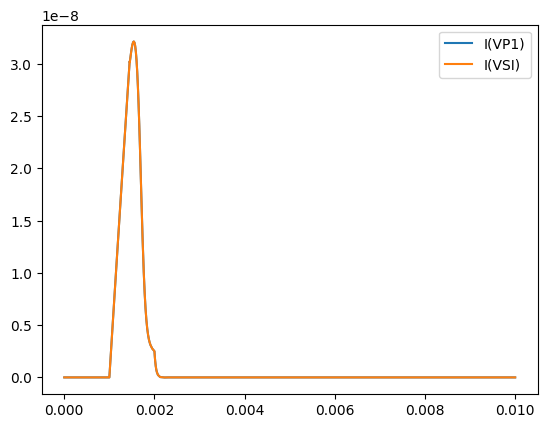

plot: valve_combine_20px_0_0.v2.m5.cir.prn


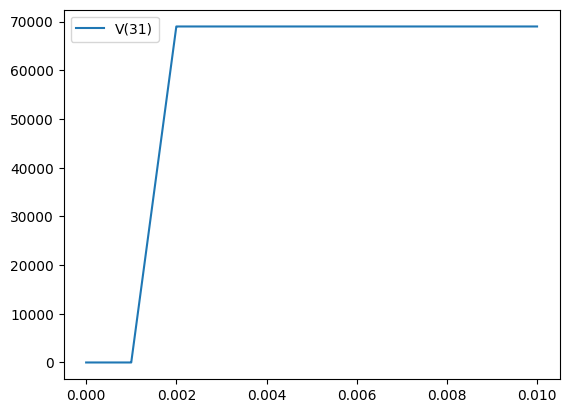


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 1 2 1e12
r2 4 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V2_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6
*threshold_pressure_kPa=60e3

vp1 3 4 0V

.tran 0.01ms 10ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Series([], Name: I(VSI), dtype: float64)
Displ vol:1.615147719432221e-11
Displ vol:1.615147672662402e-11
Displ vol:3.2302953920946226e-11


In [100]:
cir = 'valve_combine_20px_0_0.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v3.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v3.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v3.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_0.v3.m5.cir.log
plot: valve_combine_20px_0_0.v3.m5.cir.prn


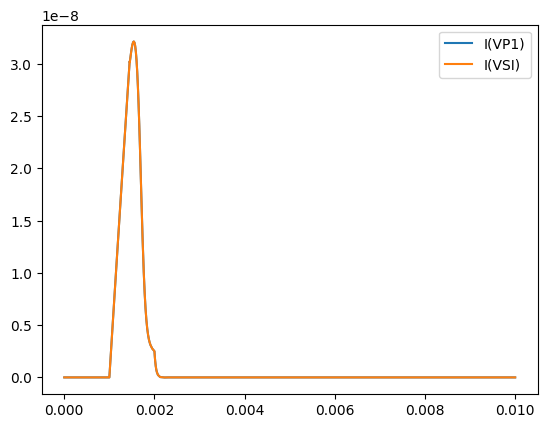

plot: valve_combine_20px_0_0.v3.m5.cir.prn


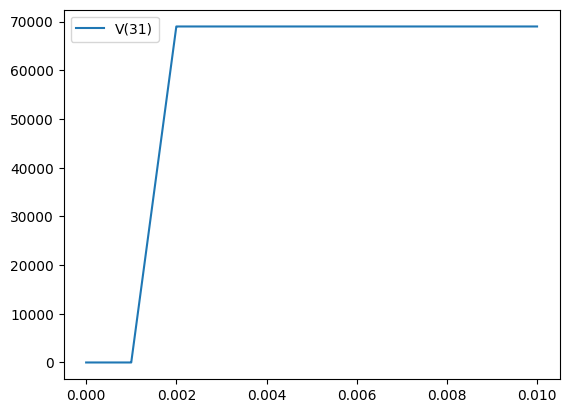


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 1 2 1e12
r2 4 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6
*threshold_pressure_kPa=60e3

vp1 3 4 0V

.tran 0.01ms 10ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Series([], Name: I(VSI), dtype: float64)
Displ vol:1.615147719432221e-11
Displ vol:1.615147672662402e-11
Displ vol:3.2302953920946226e-11


In [98]:
cir = 'valve_combine_20px_0_0.v3.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m3.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m3.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m3.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m3.cir.log
plot: valve_mem_0_0.m3.cir.prn


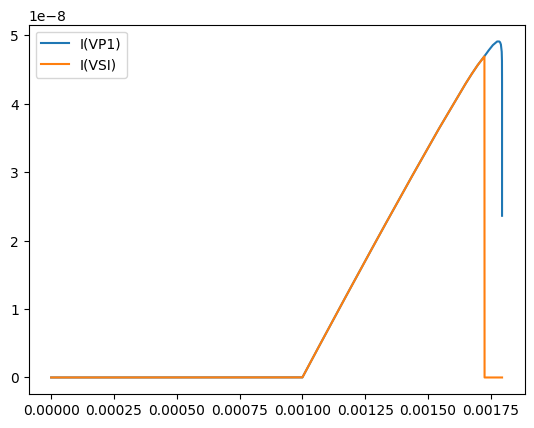

plot: valve_mem_0_0.m3.cir.prn


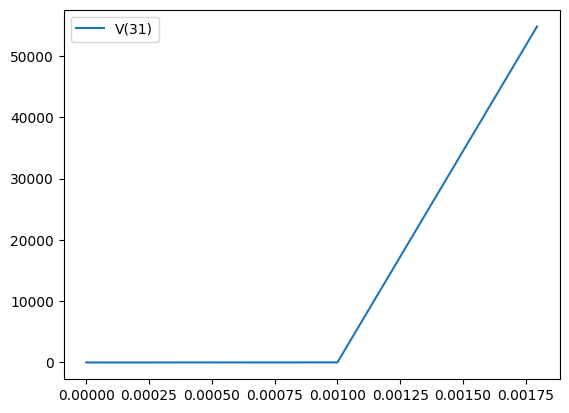


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 1 2 1e12
r2 4 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);

Yvalve_sw_20px_1_V           valv1 2 3 31 0 threshold_pressure_kPa=50e3
Ymembrane_cap_20pxV_nlin_3_1 mem1  3 31 mem_r=540e-6 fl_ch_h=60e-6

vp1 3 4 0V

.tran 0.01ms 20ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Series([], Name: I(VSI), dtype: float64)
Displ vol:2.096228333253713e-11
Displ vol:1.7575180564044988e-11
Displ vol:3.853746389658212e-11


In [84]:
cir = 'valve_mem_0_0.m3.cir'
prn_f = val_m_t_dir+'/results/'+cir+'.prn'
run_and_plot_vm(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_m_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_0.m5.cir.log
plot: valve_mem_0_0.m5.cir.prn


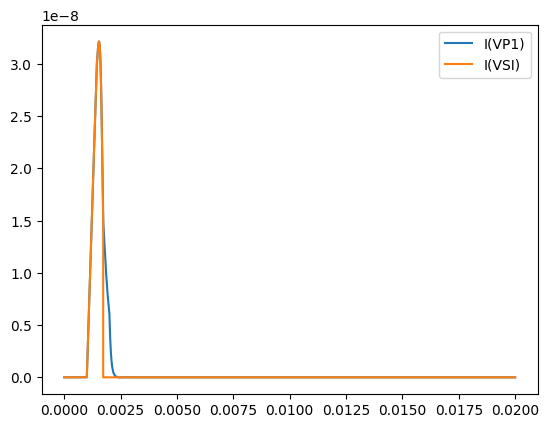

plot: valve_mem_0_0.m5.cir.prn


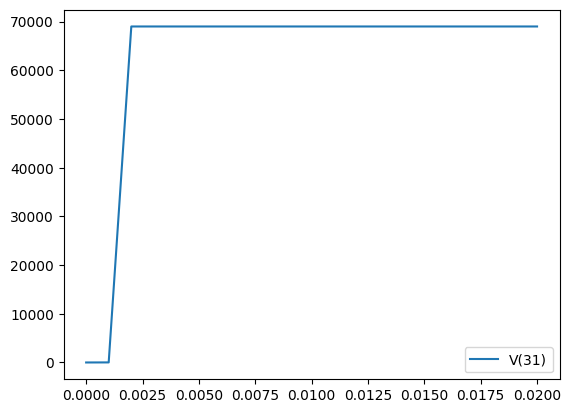


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 100ms 69kV)

r1 1 2 1e12
r2 4 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);

Yvalve_sw_20px_1_V           valv1 2 3 31 0 threshold_pressure_kPa=50e3
Ymembrane_cap_20pxV_nlin_5_1 mem1  3 31 mem_r=540e-6 fl_ch_h=60e-6

vp1 3 4 0V

.tran 0.01ms 20ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Series([], Name: I(VSI), dtype: float64)
Displ vol:1.7766825994118135e-11
Displ vol:1.4543572118556763e-11
Displ vol:3.23103981126749e-11


In [99]:
cir = 'valve_mem_0_0.m5.cir'
prn_f = val_m_t_dir+'/results/'+cir+'.prn'
run_and_plot_vm(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_m_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_1.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_1.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_1.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valv_mem/valve_mem_0_1.m5.cir.log
plot: valve_mem_0_1.m5.cir.prn


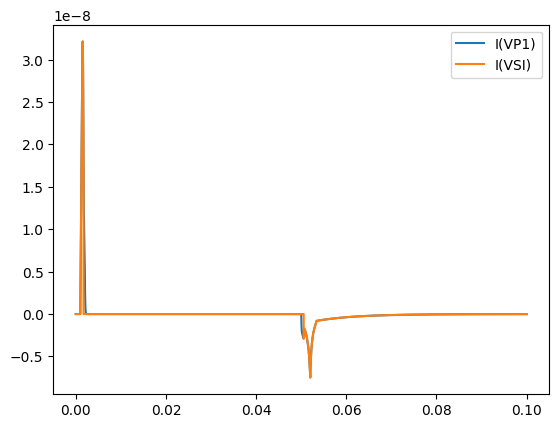

plot: valve_mem_0_1.m5.cir.prn


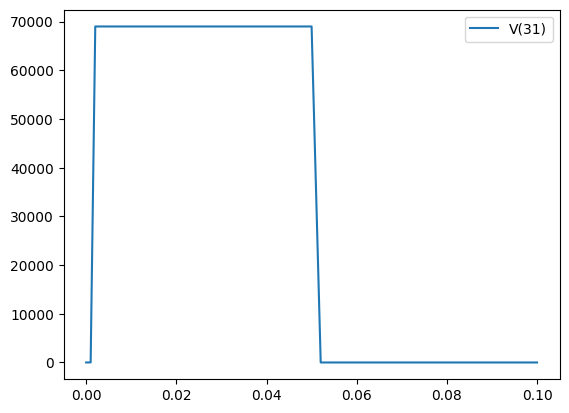


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 50ms 69kV 52ms 0V 100ms 0V)

r1 1 2 1e12
r2 4 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);

Yvalve_sw_20px_1_V           valv1 2 3 31 0 threshold_pressure_kPa=50e3
Ymembrane_cap_20pxV_nlin_5_1 mem1  3 31 mem_r=540e-6 fl_ch_h=60e-6

vp1 3 4 0V

.tran 0.01ms 100ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Series([], Name: I(VSI), dtype: float64)
Displ vol:1.0633920743370967e-12
Displ vol:-9.376704801235449e-13
Displ vol:1.2572159421355184e-13


In [89]:
cir = 'valve_mem_0_1.m5.cir'
prn_f = val_m_t_dir+'/results/'+cir+'.prn'
run_and_plot_vm(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_m_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_0_1.v2.m5.cir.log
plot: valve_combine_20px_0_1.v2.m5.cir.prn


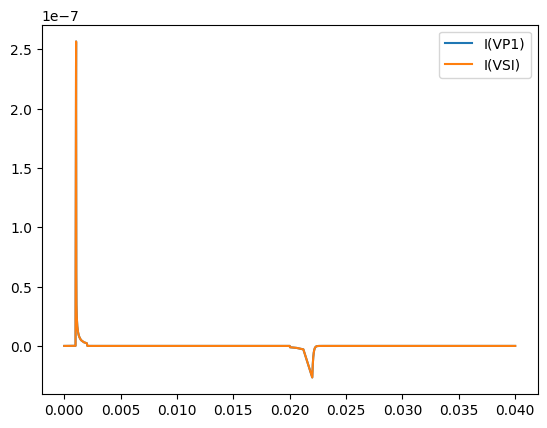

plot: valve_combine_20px_0_1.v2.m5.cir.prn


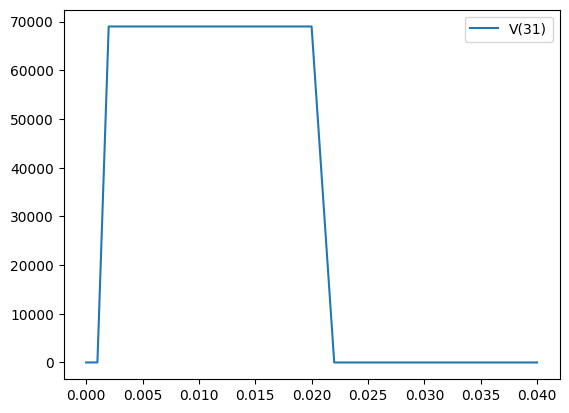


vsi 1  0 0V

vsp 31 0 PWL(0s 0V 1ms 0kV 2ms 69kV 20ms 69kV 22ms 0V 40ms 0V)

r1 1 2 1e10
r2 4 0 1e10

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V2_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6
*threshold_pressure_kPa=60e3

vp1 3 4 0V

.tran 0.01ms 40ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Series([], Name: I(VP1), dtype: float64)
Series([], Name: I(VSI), dtype: float64)
Displ vol:7.055747945979613e-14
Displ vol:7.055729129086023e-14
Displ vol:1.4111477075065636e-13


In [105]:
cir = 'valve_combine_20px_0_1.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_0.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_0.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_0.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_0.v2.m5.cir.log
plot: valve_combine_20px_1_0.v2.m5.cir.prn


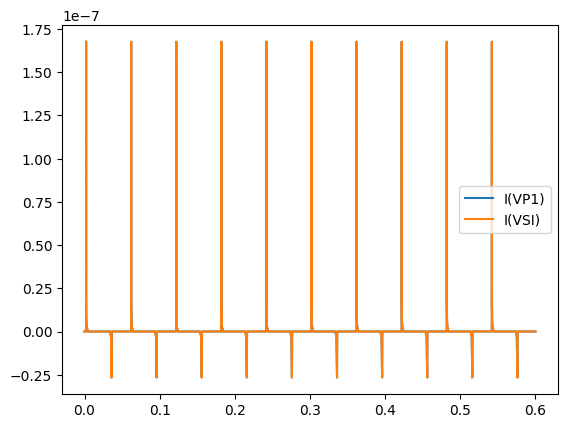

plot: valve_combine_20px_1_0.v2.m5.cir.prn


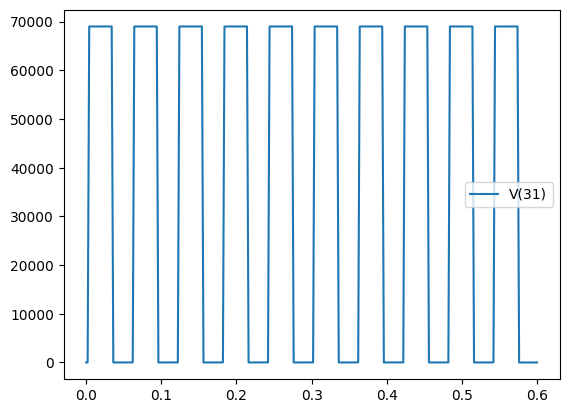


vsi 1  0 0V

vsp 31 0 PULSE(0V 69kV 2ms 2ms 2ms 30ms 60ms)

r1 1 2 1e10
r2 4 0 1e10

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V2_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6
*threshold_pressure_kPa=60e3

vp1 3 4 0V

.tran 0.01ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31)
.end
Displ vol:5.022621916926717e-13
Displ vol:5.022608225934672e-13
Displ vol:1.004523014286139e-12


In [48]:
cir = 'valve_combine_20px_1_0.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.cir.log
plot: valve_combine_20px_1_1.v2.m5.cir.prn


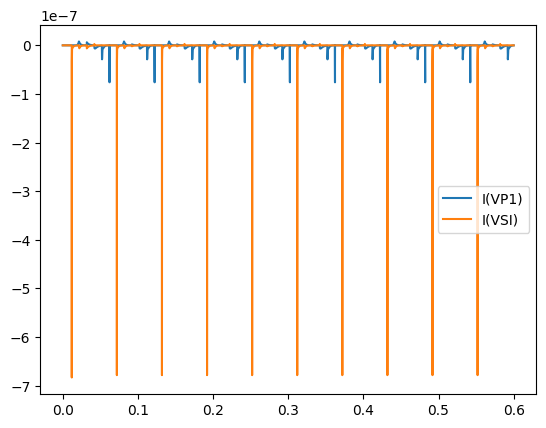

plot: valve_combine_20px_1_1.v2.m5.cir.prn


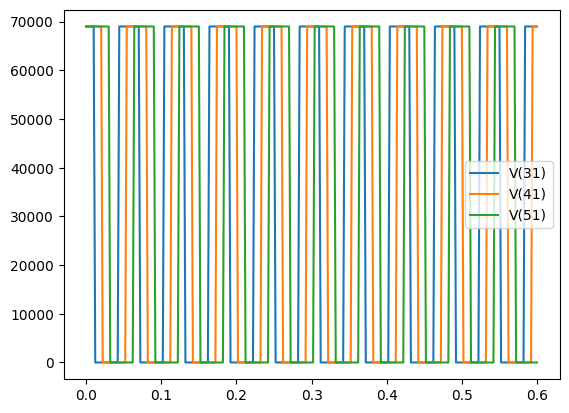


vsi 2 1 0V

vsp1 31 0 PULSE(69kV 0kV 10ms 2ms 2ms 30ms 60ms)
vsp2 41 0 PULSE(69kV 0kV 20ms 2ms 2ms 30ms 60ms)
vsp3 51 0 PULSE(69kV 0kV 30ms 2ms 2ms 30ms 60ms)

r1 0 1 1e11
r2 6 0 1e11

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 4 0V

.tran 0.001ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51)
.end
Displ vol:-4.662459719127975e-10
Displ vol:-5.014012276601432e-10
Displ vol:-9.676471995729407e-10


In [9]:
cir = 'valve_combine_20px_1_1.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.01.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.01.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.01.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.01.cir.log
plot: valve_combine_20px_1_1.v2.m5.0.01.cir.prn


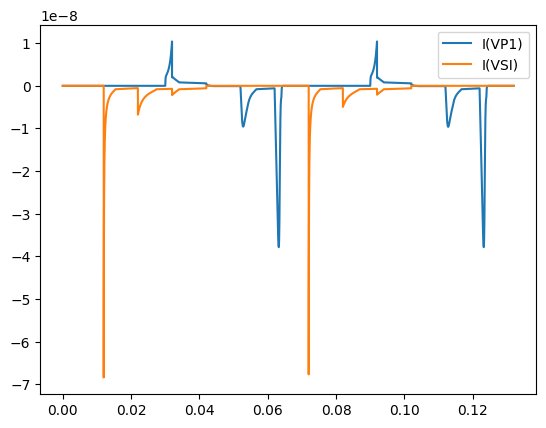

plot: valve_combine_20px_1_1.v2.m5.0.01.cir.prn


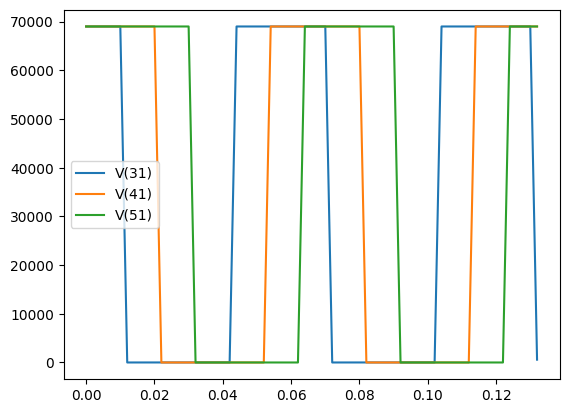


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 10ms 2ms 2ms 30ms 60ms)
vsp2 41 0 PULSE(69kV 0kV 20ms 2ms 2ms 30ms 60ms)
vsp3 51 0 PULSE(69kV 0kV 30ms 2ms 2ms 30ms 60ms)

r1 1 2 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 0.01ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51)
.end
Displ vol:-9.22442366256628e-11
Displ vol:-9.541656867073693e-11
Displ vol:-1.8766080529639972e-10


In [10]:
cir = 'valve_combine_20px_1_1.v2.m5.0.01.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.10.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.10.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.10.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_1.v2.m5.0.10.cir.log
plot: valve_combine_20px_1_1.v2.m5.0.10.cir.prn


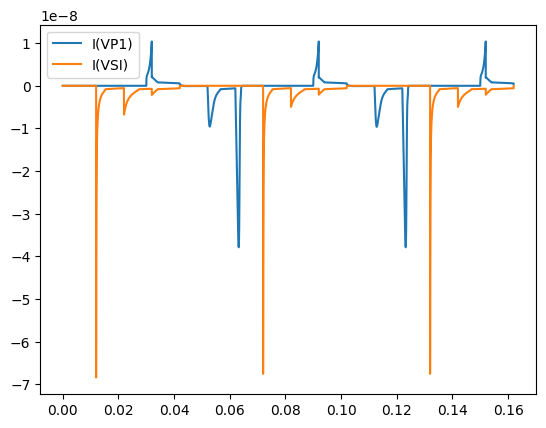

plot: valve_combine_20px_1_1.v2.m5.0.10.cir.prn


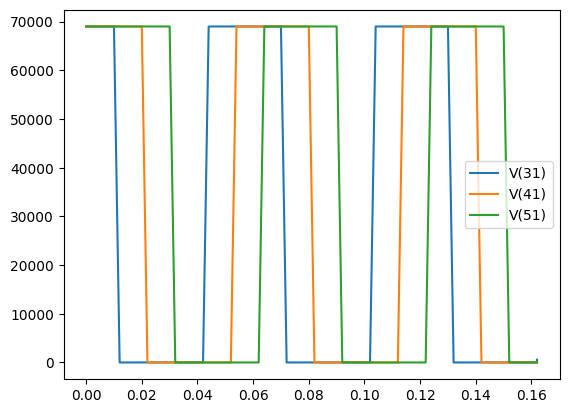


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 10ms 2ms 2ms 30ms 60ms)
vsp2 41 0 PULSE(69kV 0kV 20ms 2ms 2ms 30ms 60ms)
vsp3 51 0 PULSE(69kV 0kV 30ms 2ms 2ms 30ms 60ms)

r1 1 2 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 0.1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51)
.end
Displ vol:-7.477417916670676e-11
Displ vol:-1.4168041571863953e-10
Displ vol:-2.164545948853463e-10


In [11]:
cir = 'valve_combine_20px_1_1.v2.m5.0.10.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

In [125]:
print(I_vp_t*60/0.6 * 1e9)

9.451373495977846


Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_2.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_2.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_2.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_1_2.v2.m5.cir.log
plot: valve_combine_20px_1_2.v2.m5.cir.prn


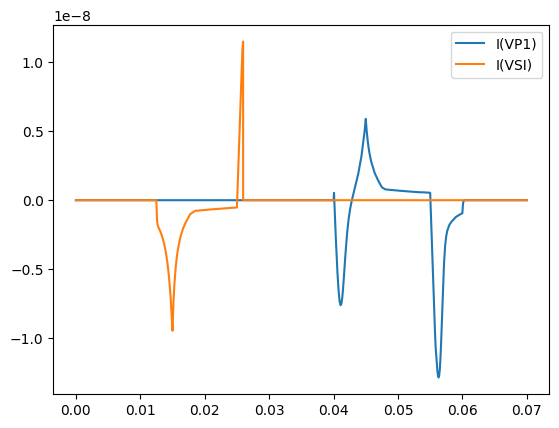

plot: valve_combine_20px_1_2.v2.m5.cir.prn


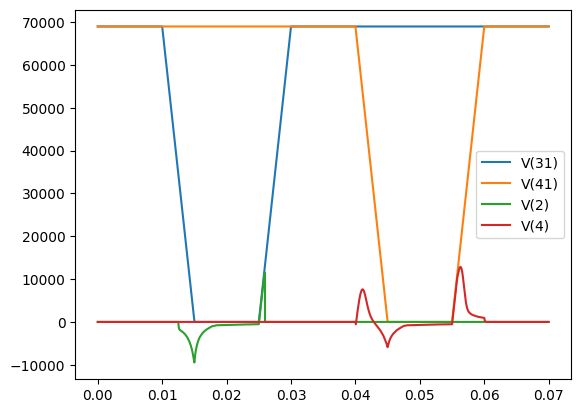


vsi 2 1 0V

vsp1 31 0 PULSE(69kV 0kV 10ms 5ms 5ms 10ms 60ms)
vsp2 41 0 PULSE(69kV 0kV 40ms 5ms 5ms 10ms 60ms)
*vsp3 51 0 PULSE(69kV 0kV 30ms 5ms 5ms 30ms 60ms)

r1 0 1 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 33 31 mem_r=540e-6 fl_ch_h=60e-6 threshold_radius=200e-6

Yvalve_fl_20px_1_V3_m5 valv2 34 4 41 mem_r=540e-6 fl_ch_h=60e-6

*Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 4 0V
vp2 34 33 0V

.tran 0.001ms 70ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(2) V(4)
.end
Displ vol:0.0
Displ vol:0.0
Displ vol:-1.6789517727277674e-11
Displ vol:-1.4075471111963807e-11
Displ vol:-1.7589161241945177e-11
Displ vol:-1.7211475579223585e-11


In [47]:
cir = 'valve_combine_20px_1_2.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t  = sum_cur(tim, I_vp)
I_vs_t  = sum_cur(tim, I_vs)

I_vp_t1 = sum_cur(tim, I_vp, [0.035,0.050])
I_vp_t2 = sum_cur(tim, I_vp, [0.050,0.065])

I_vs_t1 = sum_cur(tim, I_vs, [0.010,0.020])
I_vs_t2 = sum_cur(tim, I_vs, [0.022,0.035])

print("Displ vol:"+str(I_vp_t1))
print("Displ vol:"+str(I_vp_t2))

print("Displ vol:"+str(I_vs_t1))
print("Displ vol:"+str(I_vs_t2))

print("Displ vol:"+str(I_vs_t ))
print("Displ vol:"+str(I_vp_t ))
#print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_0.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_0.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_0.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_0.v2.m5.cir.log
plot: valve_combine_20px_2_0.v2.m5.cir.prn


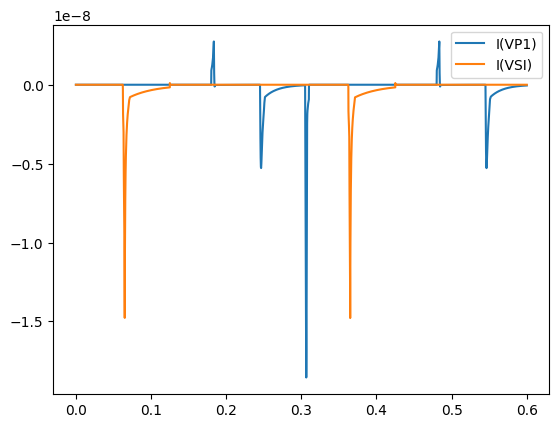

plot: valve_combine_20px_2_0.v2.m5.cir.prn


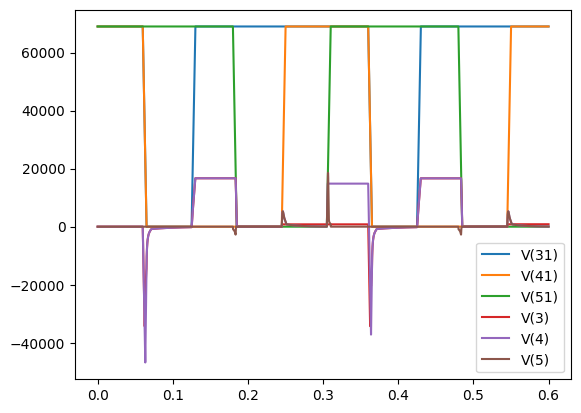


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 60ms  5ms 5ms 60ms  300ms)
vsp2 41 0 PULSE(69kV 0kV 60ms  5ms 5ms 180ms 300ms)
vsp3 51 0 PULSE(69kV 0kV 180ms 5ms 5ms 120ms  300ms)

r1 1 2 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51) V(3) V(4) V(5)
.end
Displ vol:-8.334344480037325
Displ vol:-1.167090940077645e-10
Displ vol:-8.334344480154034


In [28]:
cir = 'valve_combine_20px_2_0.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)*(60/0.6)*1e9
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_1.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_1.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_1.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_1.v2.m5.cir.log
plot: valve_combine_20px_2_1.v2.m5.cir.prn


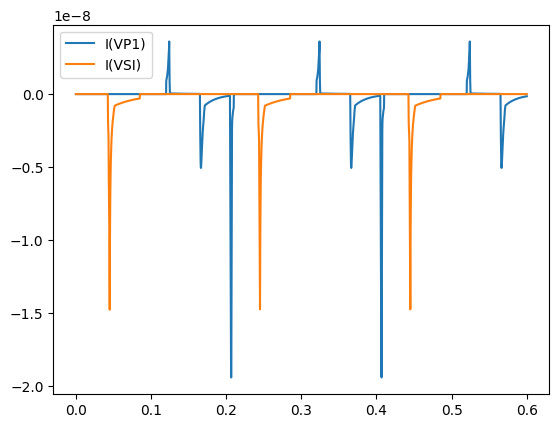

plot: valve_combine_20px_2_1.v2.m5.cir.prn


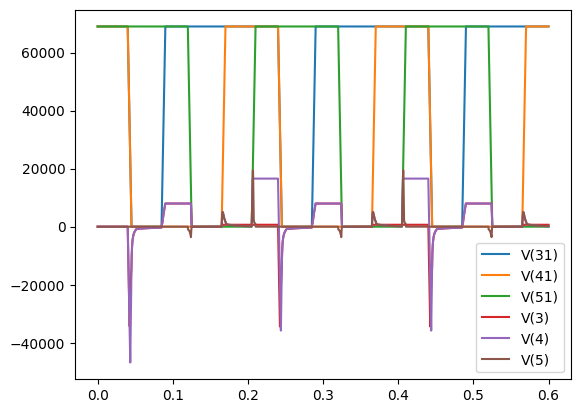


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 40ms  5ms 5ms 40ms  200ms)
vsp2 41 0 PULSE(69kV 0kV 40ms  5ms 5ms 120ms 200ms)
vsp3 51 0 PULSE(69kV 0kV 120ms 5ms 5ms 80ms  200ms)

r1 1 2 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51) V(3) V(4) V(5)
.end
Displ vol:-12.628073358279034
Displ vol:-1.606356800311146e-10
Displ vol:-12.62807335843967


In [31]:
cir = 'valve_combine_20px_2_1.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)*(60/0.6)*1e9
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_2.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_2.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_2.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_2.v2.m5.cir.log
plot: valve_combine_20px_2_2.v2.m5.cir.prn


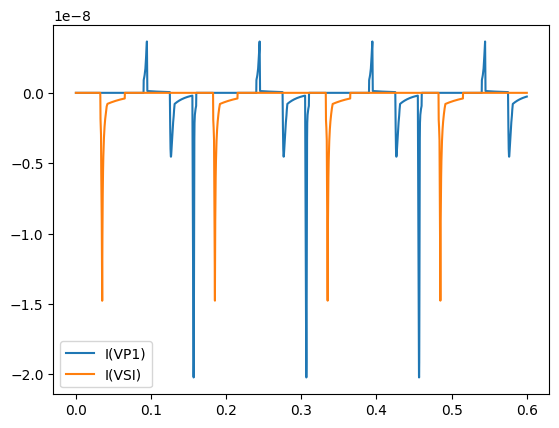

plot: valve_combine_20px_2_2.v2.m5.cir.prn


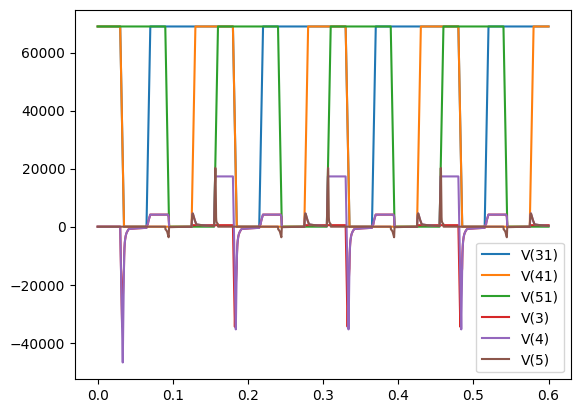


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 30ms  5ms 5ms 30ms  150ms)
vsp2 41 0 PULSE(69kV 0kV 30ms  5ms 5ms 90ms  150ms)
vsp3 51 0 PULSE(69kV 0kV 90ms  5ms 5ms 60ms  150ms)

r1 1 2 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51) V(3) V(4) V(5)
.end
Displ vol:-16.29140951175948
Displ vol:-1.9985337441596763e-10
Displ vol:-16.291409511959333


In [32]:
cir = 'valve_combine_20px_2_2.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)*(60/0.6)*1e9
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_3.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_3.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_3.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_3.v2.m5.cir.log
plot: valve_combine_20px_2_3.v2.m5.cir.prn


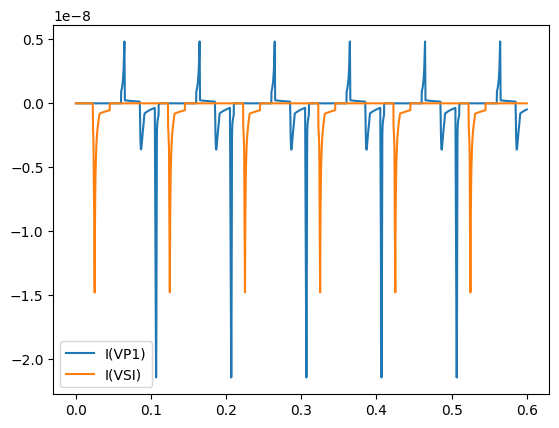

plot: valve_combine_20px_2_3.v2.m5.cir.prn


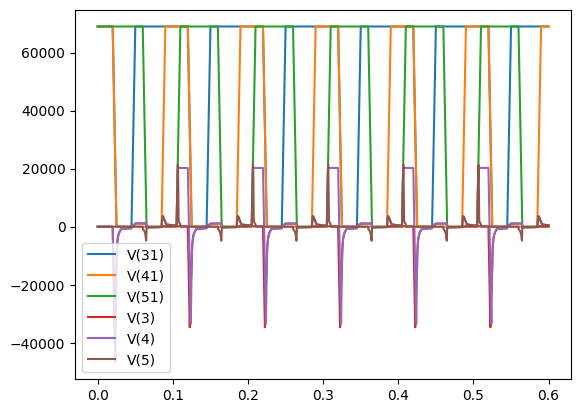


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 20ms  5ms 5ms 20ms  100ms)
vsp2 41 0 PULSE(69kV 0kV 20ms  5ms 5ms 60ms  100ms)
vsp3 51 0 PULSE(69kV 0kV 60ms  5ms 5ms 40ms  100ms)

r1 1 2 1e12
r2 6 0 1e12

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51) V(3) V(4) V(5)
.end
Displ vol:-22.801087260679314
Displ vol:-2.695951765650452e-10
Displ vol:-22.801087260948908


In [33]:
cir = 'valve_combine_20px_2_3.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)*(60/0.6)*1e9
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_4.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_4.v2.m5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_4.v2.m5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/valve_combine/valve_combine_20px_2_4.v2.m5.cir.log
plot: valve_combine_20px_2_4.v2.m5.cir.prn


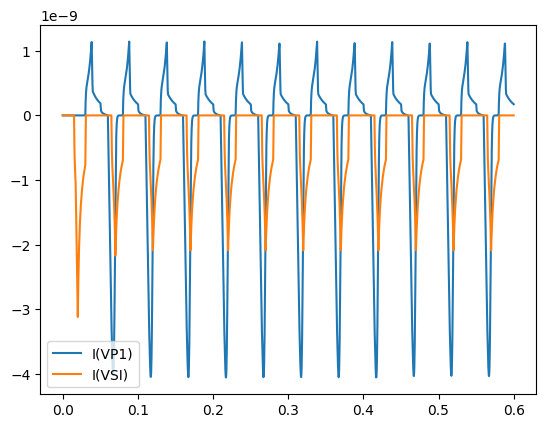

plot: valve_combine_20px_2_4.v2.m5.cir.prn


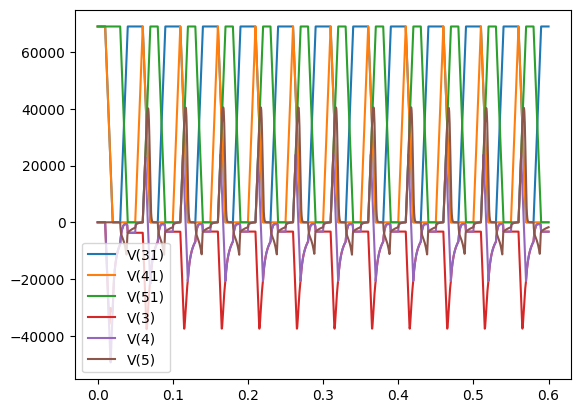


vsi 1  0 0V

vsp1 31 0 PULSE(69kV 0kV 10ms 10ms 10ms 10ms   50ms)
vsp2 41 0 PULSE(69kV 0kV 10ms 10ms 10ms 30ms   50ms)
vsp3 51 0 PULSE(69kV 0kV 30ms 10ms 10ms 20ms   50ms)

r1 1 2 1e13
r2 6 0 1e13

*module valve_fl_20px_1_V2(fl_in, fl_out,  pn_in);
Yvalve_fl_20px_1_V3_m5 valv1 2 3 31 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv2 3 4 41 mem_r=540e-6 fl_ch_h=60e-6

Yvalve_fl_20px_1_V3_m5 valv3 4 5 51 mem_r=540e-6 fl_ch_h=60e-6

vp1 6 5 0V

.tran 0.001ms 600ms 0s 1ms
.print tran I(vp1) I(vsi) V(31) V(41) V(51) V(3) V(4) V(5)
.end
Displ vol:-18.401267501824663
Displ vol:-2.1613361046010615e-10
Displ vol:-18.401267502040795


In [46]:
cir = 'valve_combine_20px_2_4.v2.m5.cir'
prn_f = val_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

with open(val_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

res = plot_result.load_prn(prn_f)
vert_line = [[0.03, 0.03], [3e-8, -3e-8]]
tim  = res['TIME'] 
I_vp = res['I(VP1)']
I_vs = res['I(VSI)']

I_vp_t = sum_cur(tim, I_vp)*(60/0.6)*1e9
I_vs_t = sum_cur(tim, I_vs)

print("Displ vol:"+str(I_vp_t))
print("Displ vol:"+str(I_vs_t))
print("Displ vol:"+str(I_vp_t+I_vs_t))